## Evolution of Lamb dipole interacting with initially uniform NIW field
Initially laterally coherent near-inertial oscillation of amplitude $u_0$ coupled with Lamb dipole of radius $R=2\pi/k_0$ and strength $U_0$.
This example runs in about 20 seconds on a MacPro 2.2 GHz Intel Core i7, 16 GB 1600 MHz DDR3.

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['contour.negative_linestyle'] = 'dashed'
%matplotlib inline
import numpy as np
from scipy import integrate

from niwqg import CoupledModel as Model
from niwqg import InitialConditions as ic

## Simulations parameters

In [2]:
nx = 128
f0 = 1.e-4
N = 0.01
L = 2*np.pi*200e3
λz = 280
m = 2*np.pi/λz

# eddy parameters
k0 = 10*(2*np.pi/L)
L0 = 2*np.pi/k0

# initial conditions
U0 = 1.e-1
phi0 = 2*U0
u0 = phi0

# simulation parameters
Te = (U0*k0)**-1 # eddy turn-over time scale
Tf = 2*np.pi/f0

dt = .025*Te
tmax = 10*Te

## Setup model class

In [3]:
m = Model.Model(L=L,nx=nx, tmax = tmax,dt = dt,
                m=m,N=N,f=f0, twrite=int(1*Tf/dt),
                nu4=5e11,nu4w=0e10, nu=20,nuw=50e0, mu=0.e-7,muw=0e-7,use_filter=False,
                U =-U0, tdiags=1,save_to_disk=False, dealias=False,)

INFO:  Logger initialized
INFO:  No dealiasing; no filter


##  Setup initial conditions

In [4]:
q = ic.LambDipole(m, U=U0,R = 2*np.pi/k0)    # Lamb dipole for quasigeostrophic q-psi
phi = (np.ones_like(q) + 1j)*u0/np.sqrt(2)  # Uniform near-inertial velocity field

m.set_q(q)
m.set_phi(phi)

# Run the model

In [5]:
m.run()

INFO: Step: 12, Time: 6.000e+04, P: 3.000e-02 , KE QG: 6.036e-04, KE NIW: 2.000e-02, PE NIW: 8.436e-08,CFL: 0.172
INFO: Step: 24, Time: 1.200e+05, P: 6.000e-02 , KE QG: 5.900e-04, KE NIW: 2.000e-02, PE NIW: 3.164e-07,CFL: 0.169
INFO: Step: 36, Time: 1.800e+05, P: 9.000e-02 , KE QG: 5.775e-04, KE NIW: 2.000e-02, PE NIW: 6.724e-07,CFL: 0.166
INFO: Step: 48, Time: 2.400e+05, P: 1.200e-01 , KE QG: 5.658e-04, KE NIW: 2.000e-02, PE NIW: 1.132e-06,CFL: 0.162
INFO: Step: 60, Time: 3.000e+05, P: 1.500e-01 , KE QG: 5.548e-04, KE NIW: 2.000e-02, PE NIW: 1.676e-06,CFL: 0.158
INFO: Step: 72, Time: 3.600e+05, P: 1.800e-01 , KE QG: 5.445e-04, KE NIW: 2.000e-02, PE NIW: 2.286e-06,CFL: 0.155
INFO: Step: 84, Time: 4.200e+05, P: 2.100e-01 , KE QG: 5.348e-04, KE NIW: 2.000e-02, PE NIW: 2.944e-06,CFL: 0.151
INFO: Step: 96, Time: 4.800e+05, P: 2.400e-01 , KE QG: 5.256e-04, KE NIW: 1.999e-02, PE NIW: 3.631e-06,CFL: 0.160
INFO: Step: 108, Time: 5.400e+05, P: 2.700e-01 , KE QG: 5.170e-04, KE NIW: 1.999e-02, PE

## Snapshot

contours: potential vorticit; colors: NIW kinetic energy density

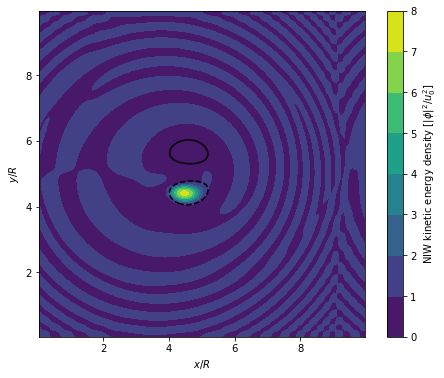

In [6]:
cq = [-2.5,-1.5,-.5,.5,1.5,2.5]

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111,aspect=1)
plt.contourf(m.x/L0,m.y/L0,np.abs(m.phi)**2/u0**2)
plt.colorbar(label=r'NIW kinetic energy density $[|\phi|^2/u_0^2]$')
plt.contour(m.x/L0,m.y/L0,m.q/U0/k0,cq,colors='k')
plt.xlabel(r'$x/R$')
plt.ylabel(r'$y/R$')

## Get diagnostics

In [7]:
time = m.diagnostics['time']['value']
KE_qg = m.diagnostics['ke_qg']['value']
Ke = m.diagnostics['Ke']['value']
Pw = m.diagnostics['Pw']['value']
Kw = m.diagnostics['Kw']['value']
PE_niw = m.diagnostics['pe_niw']['value']
KE_niw = m.diagnostics['ke_niw']['value']
ENS_qg = m.diagnostics['ens']['value']

KE_qg_q = m.diagnostics['ke_qg_q']['value']
KE_qg_w = m.diagnostics['ke_qg_w']['value']
KE_qg_qw = m.diagnostics['ke_qg_qw']['value']

g1 = m.diagnostics['gamma_r']['value']
g2 = m.diagnostics['gamma_a']['value']
x1 = m.diagnostics['xi_r']['value']
x2 = m.diagnostics['xi_a']['value']

pi = m.diagnostics['pi']['value']
cKE_niw = m.diagnostics['cke_niw']['value']
iKE_niw = m.diagnostics['ike_niw']['value']

ep_phi = m.diagnostics['ep_phi']['value']
ep_psi = m.diagnostics['ep_psi']['value']
chi_q =  m.diagnostics['chi_q']['value']
chi_phi =  m.diagnostics['chi_phi']['value']

dt = time[1]-time[0]
dPE = np.gradient(PE_niw,dt)
dKE = np.gradient(KE_qg,dt)
diKE_niw = np.gradient(iKE_niw,dt)

res_ke = dKE-(-g1-g2+x1+x2+ep_psi)
res_pe = dPE-g1-g2-chi_phi

## Energy budget, etc.

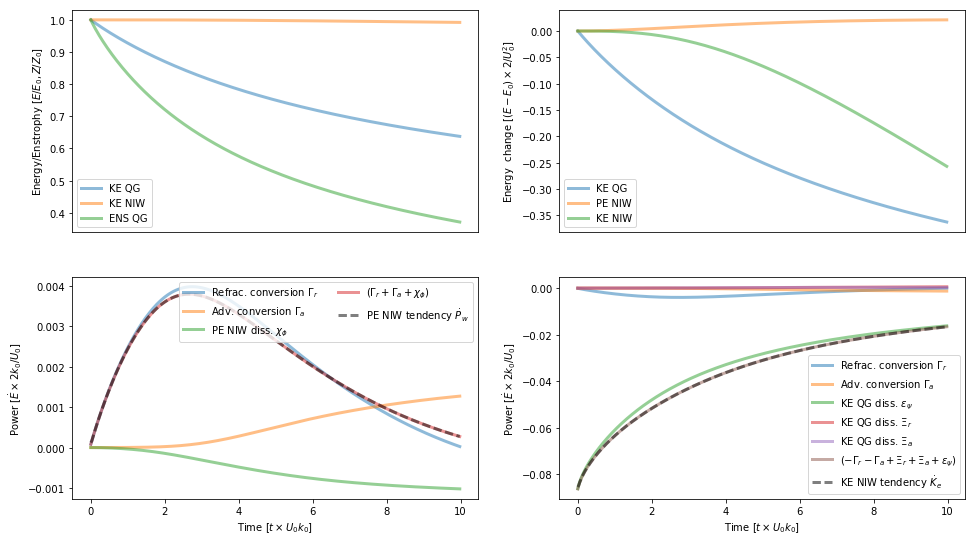

In [8]:
fig = plt.figure(figsize=(16,9))
lw, alp = 3.,.5
KE0 = KE_qg[0]

ax = fig.add_subplot(221)
plt.plot(time/Te,KE_qg/KE0,label='KE QG',linewidth=lw,alpha=alp)
plt.plot(time/Te,KE_niw/KE_niw[0],label='KE NIW',linewidth=lw,alpha=alp)
plt.plot(time/Te,ENS_qg/ENS_qg[0],label='ENS QG',linewidth=lw,alpha=alp)
plt.xticks([])
plt.ylabel(r'Energy/Enstrophy $[E/E_0, Z/Z_0]$')
plt.legend(loc=3)

ax = fig.add_subplot(222)
plt.plot(time/Te,(KE_qg-KE_qg[0])/KE0,label='KE QG',linewidth=lw,alpha=alp)
plt.plot(time/Te,(PE_niw-PE_niw[0])/KE0,label='PE NIW',linewidth=lw,alpha=alp)
plt.plot(time/Te,(KE_niw-KE_niw[0])/KE0,label='KE NIW',linewidth=lw,alpha=alp)
plt.xticks([])
plt.ylabel(r'Energy  change $[(E-E_0) \times {2}/{U_0^2} ]$')
plt.legend(loc=3)

ax = fig.add_subplot(223)
plt.plot(time/Te,Te*g1/KE0,label=r'Refrac. conversion $\Gamma_r$',linewidth=lw,alpha=alp)
plt.plot(time/Te,Te*g2/KE0,label=r'Adv. conversion $\Gamma_a$',linewidth=lw,alpha=alp)
plt.plot(time/Te,Te*chi_phi/KE0,label=r'PE NIW diss. $\chi_\phi$',linewidth=lw,alpha=alp)
plt.plot(time/Te,Te*(g1+g2+chi_phi)/KE0,label=r'$(\Gamma_r+\Gamma_a+\chi_\phi)$',linewidth=lw,alpha=alp)
plt.plot(time/Te,Te*dPE/KE0,'k--',label=r'PE NIW tendency $\dot P_w$',linewidth=lw,alpha=alp)
plt.legend(loc=1,ncol=2)
plt.xlabel(r"Time [$t \times U_0 k_0$]")
plt.ylabel(r'Power $[\dot E \times {2 k_0}/{U_0} ]$')

ax = fig.add_subplot(224)
plt.plot(time/Te,-Te*g1/KE0,label=r'Refrac. conversion $\Gamma_r$',linewidth=lw,alpha=alp)
plt.plot(time/Te,-Te*g2/KE0,label=r'Adv. conversion $\Gamma_a$',linewidth=lw,alpha=alp)
plt.plot(time/Te,Te*ep_psi/KE0,label=r'KE QG diss. $\epsilon_\psi$',linewidth=lw,alpha=alp)
plt.plot(time/Te,Te*x1/KE0,label=r'KE QG diss. $\Xi_r$',linewidth=lw,alpha=alp)
plt.plot(time/Te,Te*x2/KE0,label=r'KE QG diss. $\Xi_a$',linewidth=lw,alpha=alp)
plt.plot(time/Te,Te*(-g1-g2+x1+x2+ep_psi)/KE0,label=r'$(-\Gamma_r-\Gamma_a+\Xi_r+\Xi_a+\epsilon_\psi)$',linewidth=lw,alpha=alp)
plt.plot(time/Te,Te*dKE/KE0,'k--',label=r'KE NIW tendency $\dot K_e$',linewidth=lw,alpha=alp)
plt.xlabel(r"Time [$t \times U_0 k_0$]")
plt.ylabel(r'Power $[\dot E \times {2 k_0}/{U_0} ]$')
plt.legend(loc=4)

## Calculates the residual of energy budgets

In [9]:
i = g1.size

KE, PE = KE_qg[i-1]-KE_qg[0], PE_niw[i-1]-PE_niw[0]

G1, G2 = integrate.simps(y=g1[:i],x=time[:i]),  integrate.simps(y=g2[:i],x=time[:i])
X1 = -integrate.simps(y=x1[:i],x=time[:i])
X2 = -integrate.simps(y=x2[:i],x=time[:i])
G1_Pw, G2_Pw = G1/PE, G2/PE
G1_Ke, G2_Ke, X1_Ke, X2_Ke = G1/KE, G2/KE, X1/KE, X2/KE
G_Ke = G1_Ke+G2_Ke
CHI_Pw = integrate.simps(y=chi_phi[:i],x=time[:i])/PE
EP_Ke = -integrate.simps(y=ep_psi[:i],x=time[:i])/KE

RES_PE = 1-(G1_Pw+G2_Pw+CHI_Pw)
RES_KE = 1+(G1_Ke+G2_Ke+X1_Ke+X2_Ke+EP_Ke)

res = (dKE+dPE+ep_psi+chi_phi)
RES =  integrate.simps(y=res,x=time)/KE

In [10]:
print("Wave potential energy budget closes within %.2e%%" %(np.abs(RES_PE)*100))
print("QG kinetic energy budget closes within %.2e%%" %(np.abs(RES_KE)*100))

Wave potential energy budget closes within 8.38e-06%
QG kinetic energy budget closes within 1.75e-04%


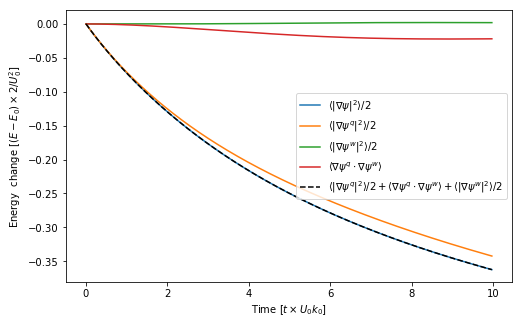

In [11]:
fig = plt.figure(figsize=(8,5))
KE_qg_tot =KE_qg_q + KE_qg_w + KE_qg_qw
plt.plot(time/Te,(KE_qg-KE_qg[0])/KE0,label=r'$\leftangle|\nabla\psi|^2\rightangle/2$')
plt.plot(time/Te,(KE_qg_q-KE_qg_q[0])/KE0,label=r'$\leftangle|\nabla\psi^q|^2\rightangle/2$')
plt.plot(time/Te,(KE_qg_w-KE_qg_w[0])/KE0,label=r'$\leftangle|\nabla\psi^w|^2\rightangle/2$')
plt.plot(time/Te,(KE_qg_qw-KE_qg_qw[0])/KE0,label=r'$\leftangle\nabla\psi^q\cdot\nabla\psi^w \rightangle$')
plt.plot(time/Te,(KE_qg_tot-KE_qg_tot[0])/KE0,'k--',\
            label=r'$\leftangle|\nabla\psi^q|^2\rightangle/2+\
                    \leftangle\nabla\psi^q\cdot\nabla\psi^w \rightangle+\
                    \leftangle|\nabla\psi^w|^2\rightangle/2$')

plt.ylabel(r'Energy  change $[(E-E_0) \times {2}/{U_0^2} ]$')
plt.xlabel(r"Time [$t \times U_0 k_0$]")
plt.legend(loc=5)